In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c=[0, 0.5, 0.5, 1]
b=[1/6 , 1/3 , 1/3 , 1/6]
a21 , a31 , a32 , a41 , a42 , a43 = 1/2, 0,1/2, 0,0,1

In [3]:
def rk4(f, y0, t):
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    for i in range(n-1):
        h = t[i+1] - t[i]
        k1 = h * (f((t[i]+h*c[0]), y[i]))
        k2 = h * (f((t[i]+h*c[1]), (y[i]+k1*a21)))
        k3 = h * (f((t[i]+h*c[2]), (y[i]+k1*a31+k2*a32)))
        k4 = h * (f((t[i]+h*c[3]), (y[i]+k1*a41+k2*a42+k3*a43)))
        k = k1*b[0]+k2*b[1]+k3*b[2]+k4*b[3]
        y[i+1] = y[i] +h*k
    return y  

In [4]:
def euler(f, y0, t):
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    for i in range(n-1):
        h = t[i+1] - t[i]
        y[i+1] = y[i] +h*(f(t[i], y[i]))
    return y 

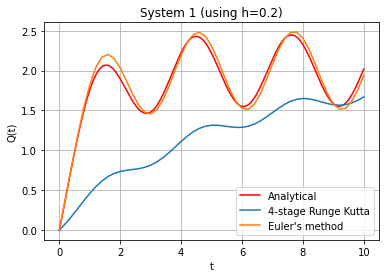

In [5]:
#System 1
def func(x,y):
    return (-y+2+np.sin(2*x))
t = np.linspace(0, 10, 51)
t1 = np.linspace(0, 10, 5001)
y_exact=(np.sin(2*t1)-2*np.cos(2*t1))/5 -1.6* np.exp(-t1) +2
sol = rk4(func, 0, t)
eulersol=euler(func, 0, t)
plt.plot(t1, y_exact, "r",label="Analytical")
plt.plot(t, sol[:],label="4-stage Runge Kutta")
plt.plot(t, eulersol[:],label="Euler's method")
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('Q(t)')
plt.title("System 1 (using h=0.2)");
plt.grid()
plt.show()

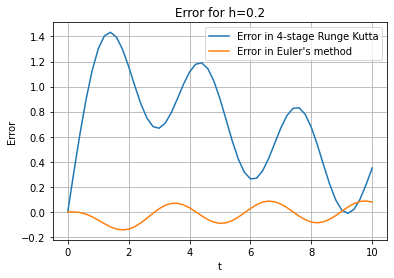

In [6]:
y_exact=(np.sin(2*t)-2*np.cos(2*t))/5 -1.6* np.exp(-t) +2
y_diff =y_exact - sol
y_diff1 =y_exact - eulersol
plt.plot(t, y_diff[:],label="Error in 4-stage Runge Kutta")
plt.plot(t, y_diff1[:],label="Error in Euler's method")
plt.ylabel("Error")
plt.xlabel("t")
plt.title("Error for h=0.2");
plt.legend(loc='best')
plt.grid()
plt.show()

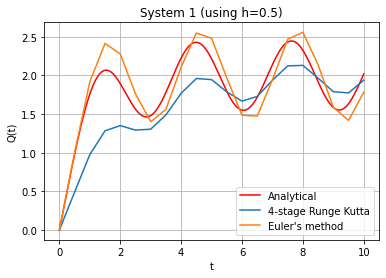

In [7]:
t = np.linspace(0, 10, 21)
t1 = np.linspace(0, 10, 5001)
y_exact=(np.sin(2*t1)-2*np.cos(2*t1))/5 -1.6* np.exp(-t1) +2
sol = rk4(func, 0, t)
eulersol=euler(func, 0, t)
plt.plot(t1, y_exact, "r",label="Analytical")
plt.plot(t, sol[:],label="4-stage Runge Kutta")
plt.plot(t, eulersol[:],label="Euler's method")
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('Q(t)')
plt.title("System 1 (using h=0.5)");
plt.grid()
plt.show()

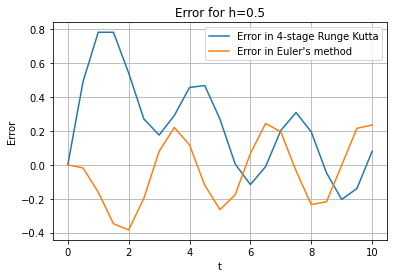

In [8]:
y_exact=(np.sin(2*t)-2*np.cos(2*t))/5 -1.6* np.exp(-t) +2
y_diff =y_exact - sol
y_diff1 =y_exact - eulersol
plt.plot(t, y_diff[:],label="Error in 4-stage Runge Kutta")
plt.plot(t, y_diff1[:],label="Error in Euler's method")
plt.ylabel("Error")
plt.xlabel("t")
plt.title("Error for h=0.5");
plt.legend(loc='best')
plt.grid()
plt.show()

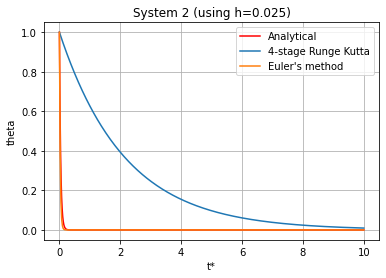

In [9]:
#System 2
t = np.linspace(0, 10, 401)
t1 = np.linspace(0, 10, 5001)
y_exact = np.exp(-25*t1)
def func(t,theta):
    return (-25*theta)
sol = rk4(func, 1, t)
eulersol=euler(func, 1, t)
plt.plot(t1, y_exact, "r",label="Analytical")
plt.plot(t, sol[:],label="4-stage Runge Kutta")
plt.plot(t, eulersol[:],label="Euler's method")
plt.legend(loc='best')
plt.xlabel('t*')
plt.ylabel('theta')
plt.title("System 2 (using h=0.025)");
plt.grid()
plt.show()

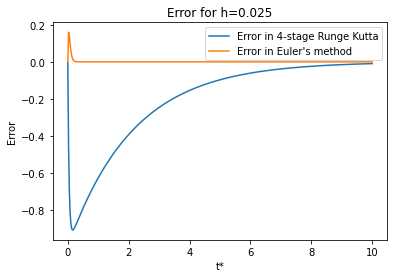

In [10]:
y_exact = np.exp(-25*t)
y_diff = y_exact - sol
y_diff1 =y_exact - eulersol
plt.plot(t, y_diff,label="Error in 4-stage Runge Kutta")
plt.plot(t, y_diff1,label="Error in Euler's method")
plt.ylabel("Error")
plt.xlabel("t*")
plt.legend(loc='best')
plt.title("Error for h=0.025");